#**Credit Risk Prediction**
Author: Waldy Setiono (waldysetiono@gmail.com)

**Background**: A finance company has been providing loans to people in the past several decades. Sometimes the borrowers can provide repayments without fail, sometimes some other borrowers fail to meet the legal obligations of the loans. Now the company wants to minimize the default rate by approving loan applications more wisely. This project aims to a make predictive model that can help the company assess applicants' decency in getting the loans by learning from past experiences.

**Data**: The data used in this project is from [IBM Github page]((https://github.com/IBM)).

##**Data Wrangling and Exploratory Data Analysis**

**Importing packages**

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

**Loading data**

In [ ]:
# Load the data
data = pd.read_csv("https://raw.githubusercontent.com/waldysetio/credit-risk/main/data/german_credit_data.csv")

In [ ]:
# See what the data set looks like
data

,Unnamed: 0,CustomerID,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,CurrentResidenceDuration,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
0,0,713a336c-a255-4e2d-9d57-90b3e99e2f06,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,3,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
1,1,140b363f-a3fe-4828-a33f-7284dfdb3969,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,2,savings_insurance,37,stores,own,2,skilled,1,none,yes,No Risk
2,2,43b7b51d-5eda-4860-b461-ebef3d3436f4,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,3,real_estate,28,none,own,2,skilled,1,yes,no,No Risk
3,3,f40eaf08-e6d1-4765-ab20-c5f7faca1635,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,2,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
4,4,1728910a-d3ff-4799-ac50-203a3a58a3fb,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,3,unknown,57,none,own,2,skilled,1,none,yes,Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,e77fa77b-78da-4607-a2fa-ede36c1e968f,greater_200,27,credits_paid_to_date,furniture,4650,less_100,1_to_4,3,male,none,4,savings_insurance,40,none,own,1,skilled,1,none,yes,No Risk
4996,4996,6e71db4b-375c-42e1-b4a8-3292c007967a,0_to_200,11,prior_payments_delayed,furniture,250,greater_1000,4_to_7,3,male,none,3,car_other,32,bank,own,1,unemployed,1,none,yes,No Risk
4997,4997,db501d22-e0c9-4f38-bf05-7f2c1df35395,no_checking,32,outstanding_credit,appliances,6536,unknown,greater_7,5,male,co-applicant,5,unknown,54,stores,own,2,unskilled,2,yes,yes,Risk
4998,4998,802055d6-6aa7-4532-bf1c-0b8b114b483d,0_to_200,38,outstanding_credit,other,1597,500_to_1000,greater_7,3,female,co-applicant,3,savings_insurance,27,stores,own,1,skilled,1,none,yes,Risk


Let's check if there are missing values.

**Missing values**

In [ ]:
# Identify missing values
missing_data = data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Unnamed: 0
False    5000
Name: Unnamed: 0, dtype: int64

CustomerID
False    5000
Name: CustomerID, dtype: int64

CheckingStatus
False    5000
Name: CheckingStatus, dtype: int64

LoanDuration
False    5000
Name: LoanDuration, dtype: int64

CreditHistory
False    5000
Name: CreditHistory, dtype: int64

LoanPurpose
False    5000
Name: LoanPurpose, dtype: int64

LoanAmount
False    5000
Name: LoanAmount, dtype: int64

ExistingSavings
False    5000
Name: ExistingSavings, dtype: int64

EmploymentDuration
False    5000
Name: EmploymentDuration, dtype: int64

InstallmentPercent
False    5000
Name: InstallmentPercent, dtype: int64

Sex
False    5000
Name: Sex, dtype: int64

OthersOnLoan
False    5000
Name: OthersOnLoan, dtype: int64

CurrentResidenceDuration
False    5000
Name: CurrentResidenceDuration, dtype: int64

OwnsProperty
False    5000
Name: OwnsProperty, dtype: int64

Age
False    5000
Name: Age, dtype: int64

InstallmentPlans
False    5000
Name: InstallmentPlans, dtype: int64

Housin

It looks there is no missing value in the data set. Great! Now let's see the data type of each column and how they are correlated with one another. 

**Descriptive Statistics**

In [ ]:
# Print the data type
print(data.dtypes)

Unnamed: 0                   int64
CustomerID                  object
CheckingStatus              object
LoanDuration                 int64
CreditHistory               object
LoanPurpose                 object
LoanAmount                   int64
ExistingSavings             object
EmploymentDuration          object
InstallmentPercent           int64
Sex                         object
OthersOnLoan                object
CurrentResidenceDuration     int64
OwnsProperty                object
Age                          int64
InstallmentPlans            object
Housing                     object
ExistingCreditsCount         int64
Job                         object
Dependents                   int64
Telephone                   object
ForeignWorker               object
Risk                        object
dtype: object


In [ ]:
# Find out the correlation among columns
data.corr()

,Unnamed: 0,LoanDuration,LoanAmount,InstallmentPercent,CurrentResidenceDuration,Age,ExistingCreditsCount,Dependents
Unnamed: 0,1.000000,0.000293,-0.006283,0.004290,0.023128,0.007087,0.003582,-0.001247
LoanDuration,0.000293,1.000000,0.670614,0.687898,0.557946,0.546914,0.489787,0.293867
LoanAmount,-0.006283,0.670614,1.000000,0.722800,0.614925,0.641352,0.562614,0.338788
InstallmentPercent,0.004290,0.687898,0.722800,1.000000,0.657493,0.617009,0.516673,0.324706
CurrentResidenceDuration,0.023128,0.557946,0.614925,0.657493,1.000000,0.542147,0.420342,0.283789
Age,0.007087,0.546914,0.641352,0.617009,0.542147,1.000000,0.536857,0.316068
ExistingCreditsCount,0.003582,0.489787,0.562614,0.516673,0.420342,0.536857,1.000000,0.335467
Dependents,-0.001247,0.293867,0.338788,0.324706,0.283789,0.316068,0.335467,1.000000


In [ ]:
# Print basic statistics of the data
data.describe()

,Unnamed: 0,LoanDuration,LoanAmount,InstallmentPercent,CurrentResidenceDuration,Age,ExistingCreditsCount,Dependents
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2499.500000,21.393000,3480.145000,2.982400,2.854200,35.932400,1.465800,1.164600
std,1443.520003,11.162843,2488.232783,1.127096,1.115702,10.648536,0.565415,0.370856
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,1249.750000,13.000000,1326.750000,2.000000,2.000000,28.000000,1.000000,1.000000
50%,2499.500000,21.000000,3238.500000,3.000000,3.000000,36.000000,1.000000,1.000000
75%,3749.250000,29.000000,5355.000000,4.000000,4.000000,44.000000,2.000000,1.000000
max,4999.000000,64.000000,11676.000000,6.000000,6.000000,74.000000,4.000000,2.000000


In [ ]:
# Print the statistics including columns with object data type
data.describe(include=['object'])

,CustomerID,CheckingStatus,CreditHistory,LoanPurpose,ExistingSavings,EmploymentDuration,Sex,OthersOnLoan,OwnsProperty,InstallmentPlans,Housing,Job,Telephone,ForeignWorker,Risk
count,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,5000,4,5,11,5,5,2,3,4,3,3,4,2,2,2
top,a12cc897-401f-4ad4-869b-1a48acca80bf,no_checking,prior_payments_delayed,car_new,less_100,1_to_4,male,none,savings_insurance,none,own,skilled,none,yes,No Risk
freq,1,1993,1686,945,1856,1470,3104,4173,1660,3517,3195,3400,2941,4877,3330


###**Data Visualization**

Let's see how many customers who have chance of default on the loan and how many customers whose loans will be paid off based on some of the features.

In [ ]:
# Functions of risk status plot settings
def plot_stacked_bars(dataframe, title_, size_=(17, 10), rot_=0, legend_="upper right"):
    ax = dataframe.plot(kind="bar",
                        stacked=True,
                        figsize=size_,
                        rot=rot_,
                        title=title_)
    annotate_stacked_bars(ax, textsize=14)
    plt.legend(["No Risk", "Risk"], loc=legend_)
    plt.ylabel("Customer base")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    for p in ax.patches:
        value = str(round(p.get_height(),1))
        if value == '0.0':
          continue
        ax.annotate(value,
                    ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
                    color=colour,
                    size=textsize,
                   )

**Credit history**

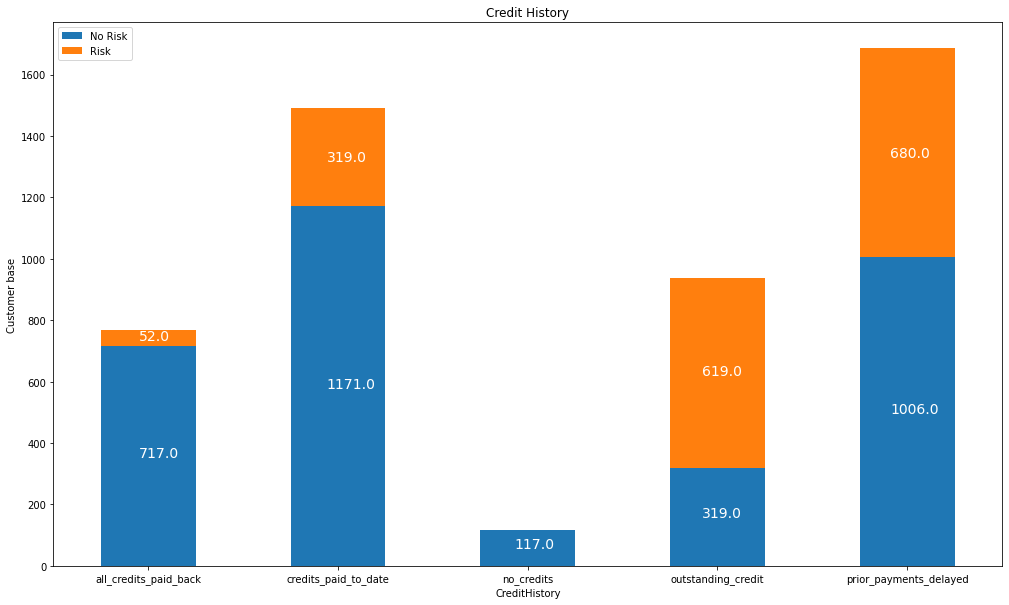

In [ ]:
# Plot risk related to credit history
credit_history = data.groupby([data["CreditHistory"], data["Risk"]])["CustomerID"].count().unstack(level=1).fillna(0)
plot_stacked_bars(credit_history, "Credit History", legend_="upper left")

**Loan duration**

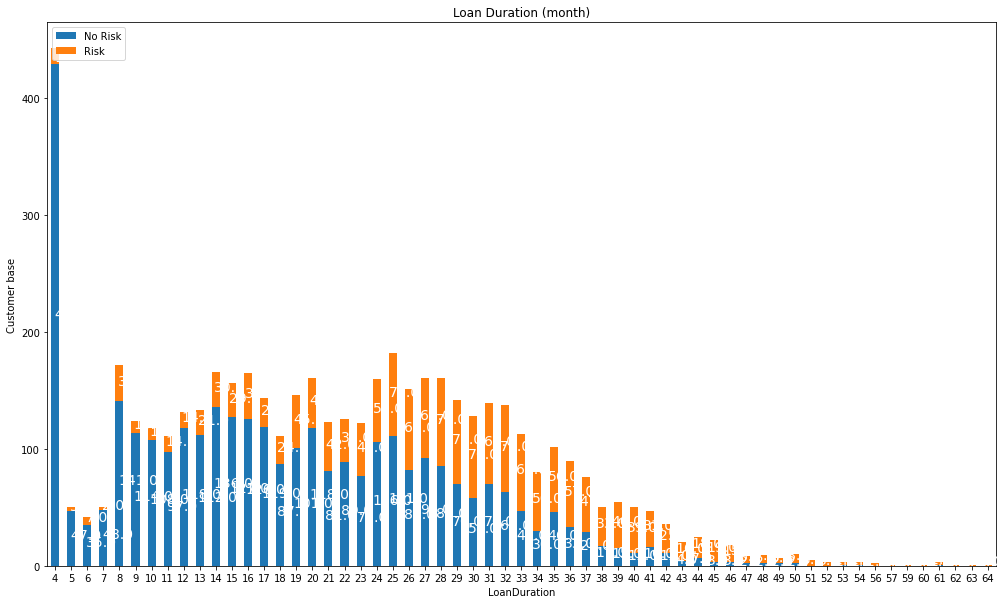

In [ ]:
# Plot risk related to loan duration
loan_duration = data.groupby([data["LoanDuration"], data["Risk"]])["CustomerID"].count().unstack(level=1).fillna(0)
plot_stacked_bars(loan_duration, "Loan Duration (month)", legend_="upper left")

**Job**

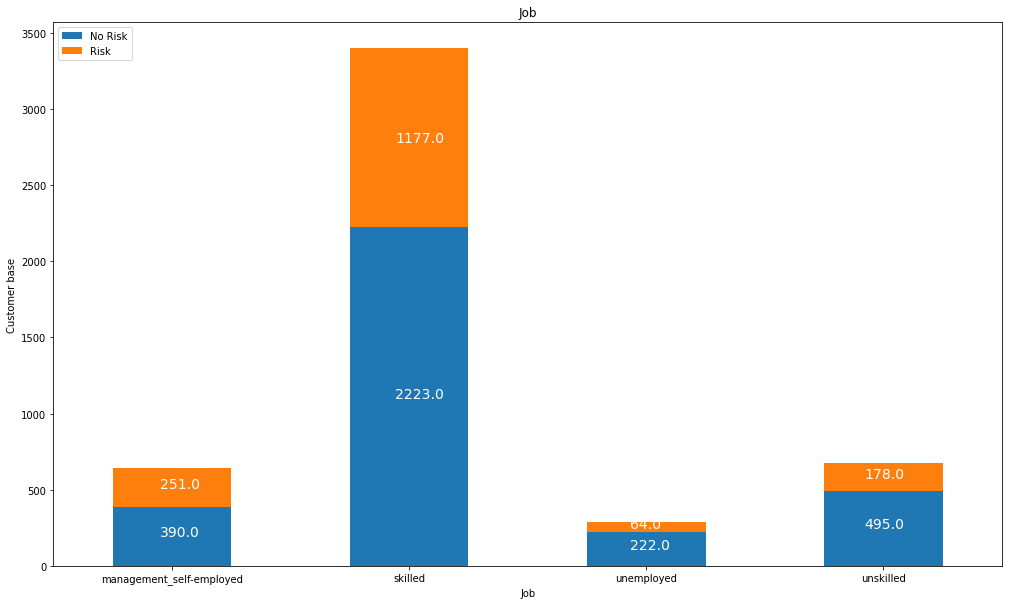

In [ ]:
# Plot risk related to job
job = data.groupby([data["Job"], data["Risk"]])["CustomerID"].count().unstack(level=1).fillna(0)
plot_stacked_bars(job, "Job", legend_="upper left")

**Employment duration**

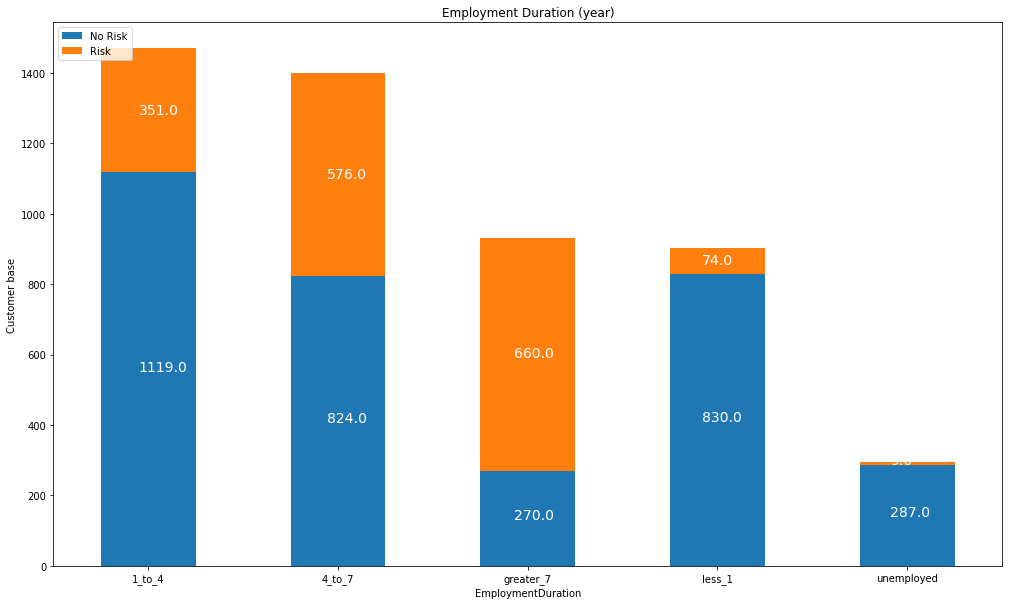

In [ ]:
# Plot risk related to loan amount
employment_duration = data.groupby([data["EmploymentDuration"], data["Risk"]])["CustomerID"].count().unstack(level=1).fillna(0)
plot_stacked_bars(employment_duration, "Employment Duration (year)", legend_="upper left")

**Checking status**

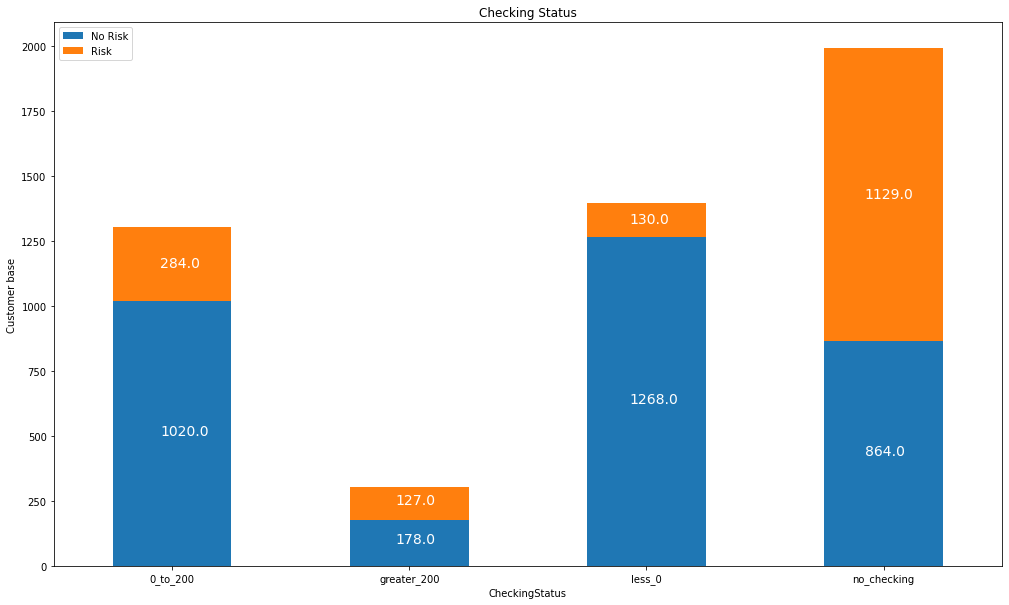

In [ ]:
# Plot risk related to checking status
checking_status = data.groupby([data["CheckingStatus"], data["Risk"]])["CustomerID"].count().unstack(level=1).fillna(0)
plot_stacked_bars(checking_status, "Checking Status", legend_="upper left")

**Loan purpose**

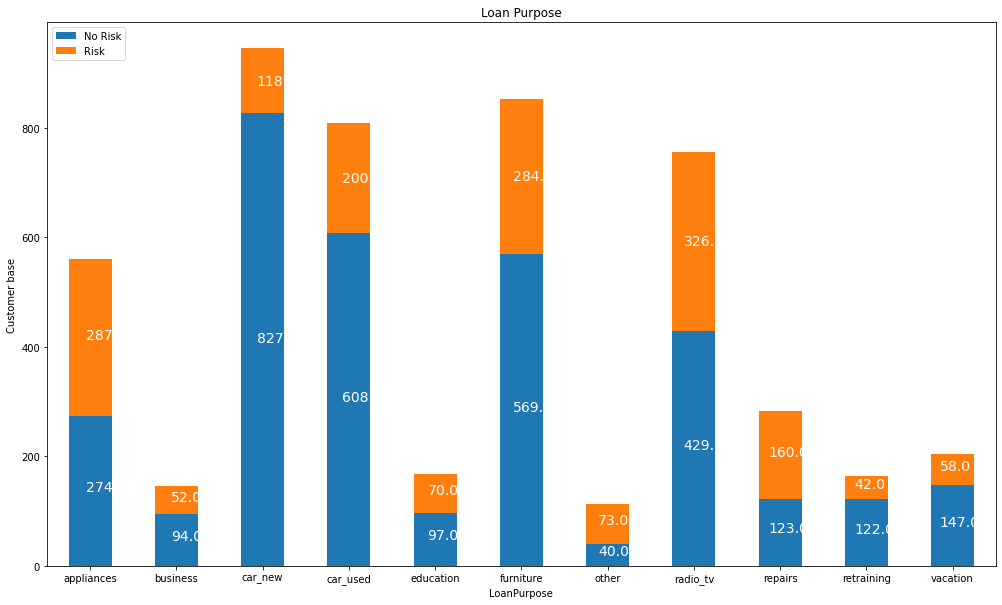

In [ ]:
# Plot risk related to loan purpose
loan_purpose = data.groupby([data["LoanPurpose"], data["Risk"]])["CustomerID"].count().unstack(level=1).fillna(0)
plot_stacked_bars(loan_purpose, "Loan Purpose", legend_="upper left")

**Existing savings**

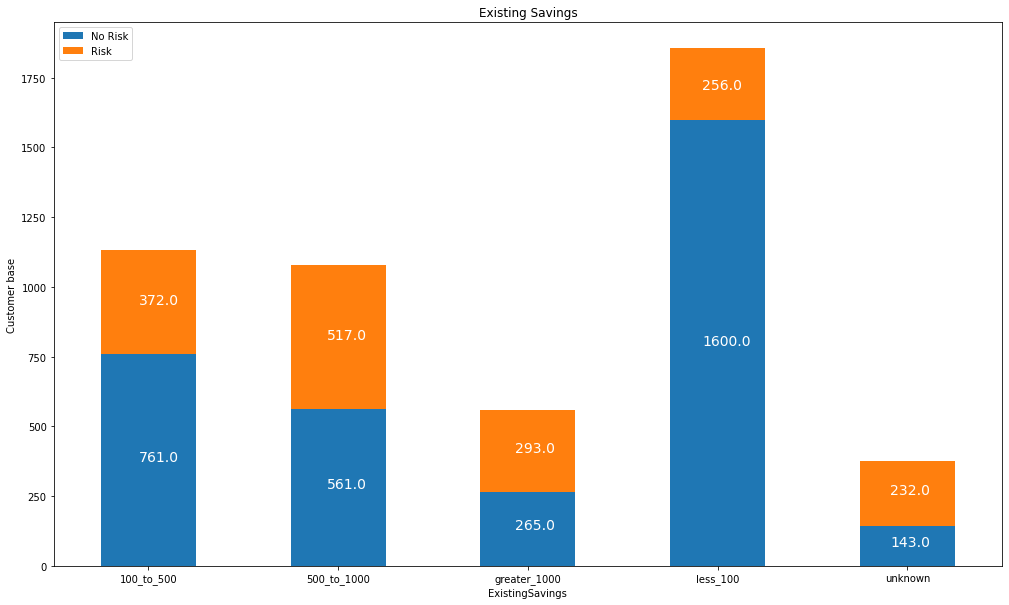

In [ ]:
# Plot risk related to existing savings
existing_savings = data.groupby([data["ExistingSavings"], data["Risk"]])["CustomerID"].count().unstack(level=1).fillna(0)
plot_stacked_bars(existing_savings, "Existing Savings", legend_="upper left")

**Current residence duration**

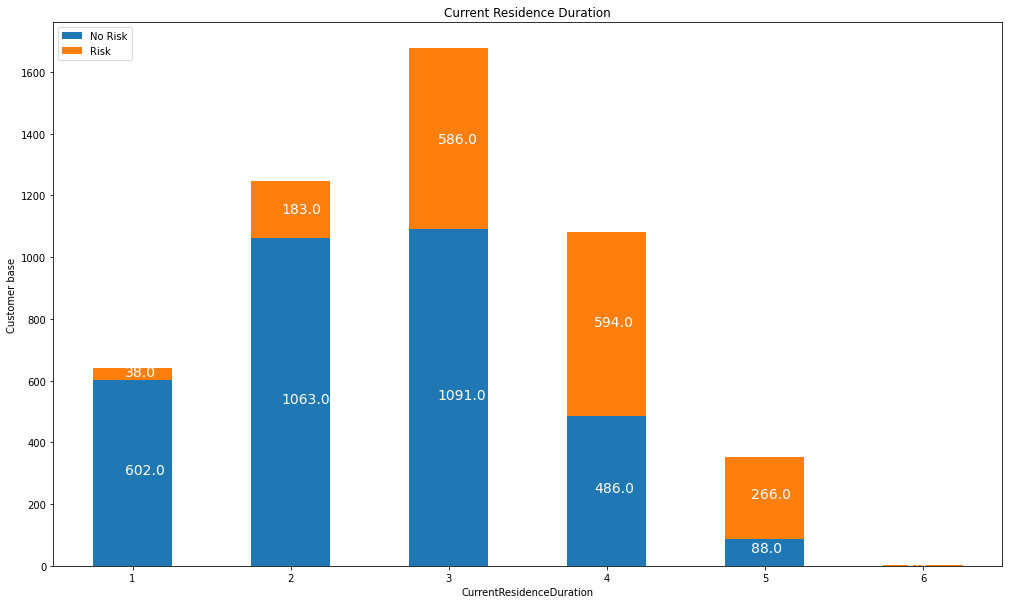

In [ ]:
# Plot risk related to current residence duration
current_residence_duration = data.groupby([data["CurrentResidenceDuration"], data["Risk"]])["CustomerID"].count().unstack(level=1).fillna(0)
plot_stacked_bars(current_residence_duration, "Current Residence Duration", legend_="upper left")

**Domestic or foreign worker**

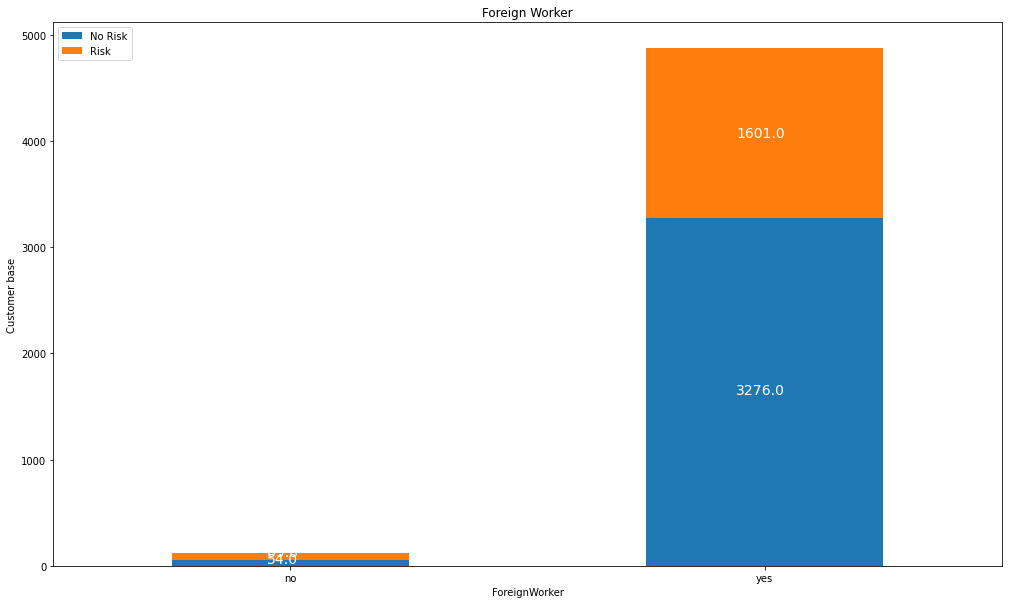

In [ ]:
# Plot risk related worker status
foreign_worker = data.groupby([data["ForeignWorker"], data["Risk"]])["CustomerID"].count().unstack(level=1).fillna(0)
plot_stacked_bars(foreign_worker, "Foreign Worker", legend_="upper left")

**Housing**

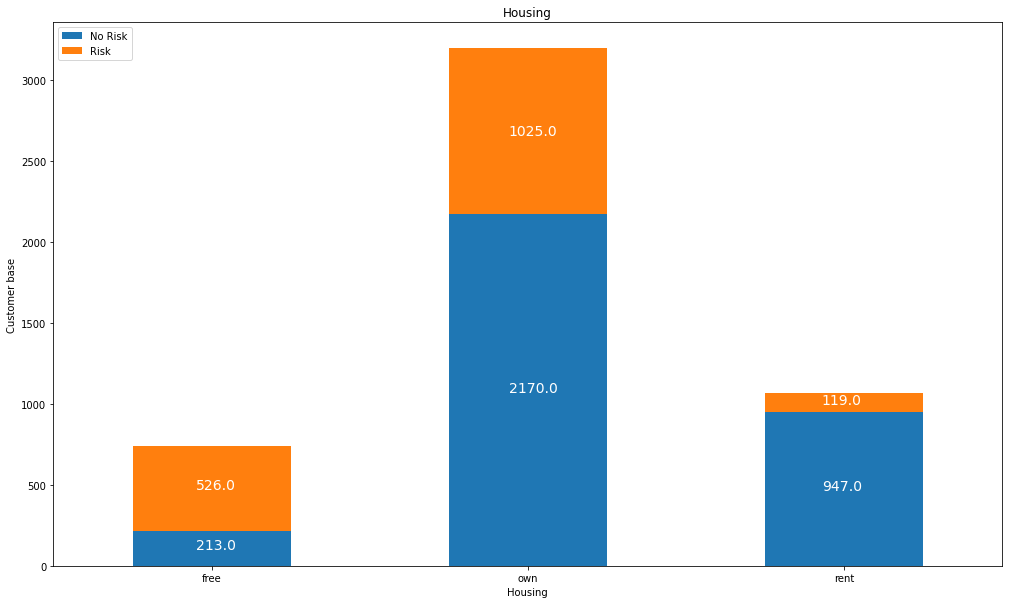

In [ ]:
# Plot risk related to housing
housing = data.groupby([data["Housing"], data["Risk"]])["CustomerID"].count().unstack(level=1).fillna(0)
plot_stacked_bars(housing, "Housing", legend_="upper left")

**Property ownership**

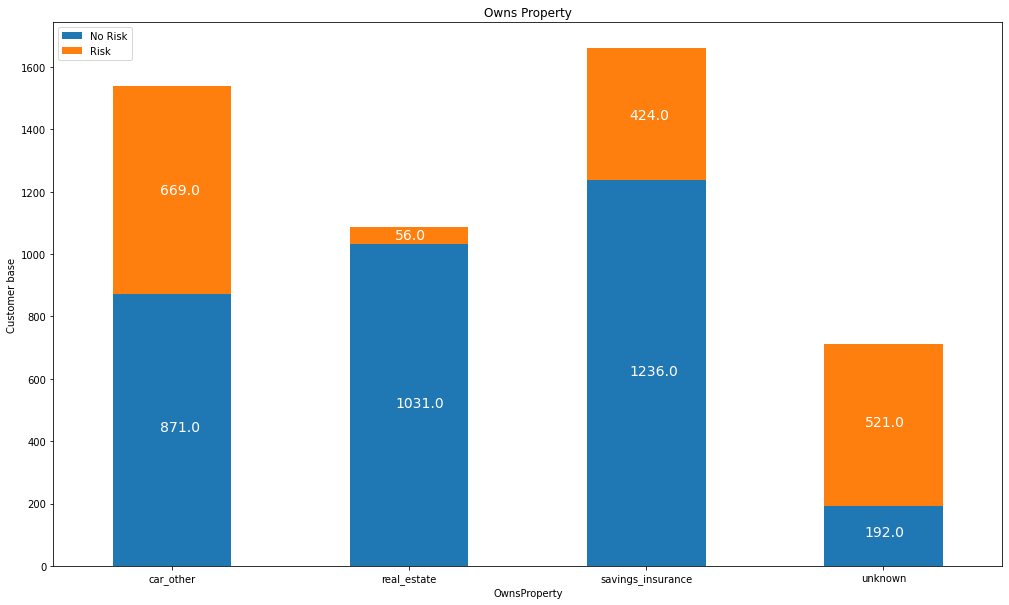

In [ ]:
# Plot risk related to property ownership
owns_property = data.groupby([data["OwnsProperty"], data["Risk"]])["CustomerID"].count().unstack(level=1).fillna(0)
plot_stacked_bars(owns_property, "Owns Property", legend_="upper left")

**Age**

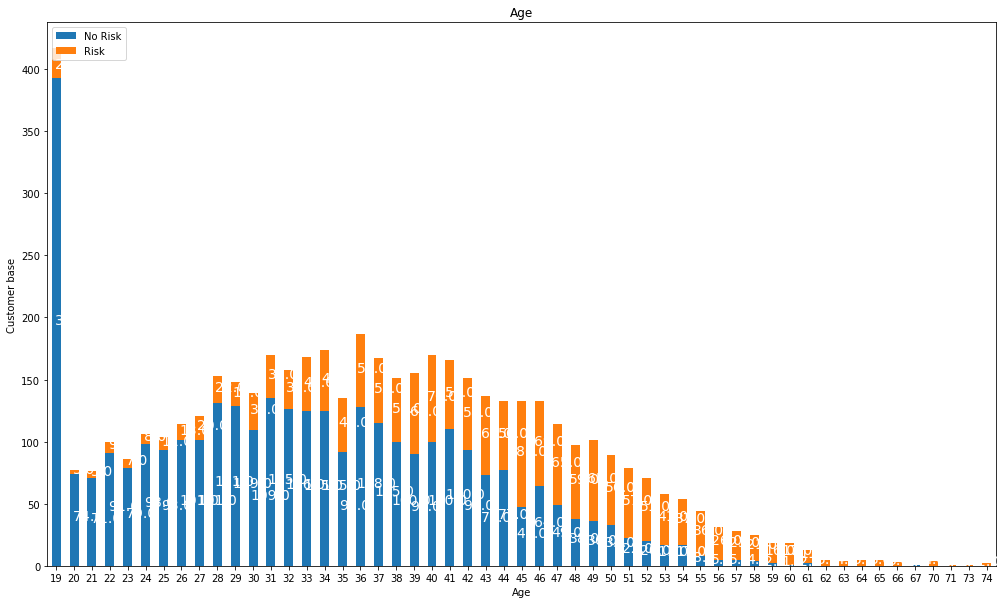

In [ ]:
# Plot risk related to age
age = data.groupby([data["Age"], data["Risk"]])["CustomerID"].count().unstack(level=1).fillna(0)
plot_stacked_bars(age, "Age", legend_="upper left")

###**Data Cleaning**

In [ ]:
# Remove column "Unnamed: 0"
data = data.drop(columns=["Unnamed: 0"])
data

,CustomerID,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,CurrentResidenceDuration,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
0,713a336c-a255-4e2d-9d57-90b3e99e2f06,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,3,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
1,140b363f-a3fe-4828-a33f-7284dfdb3969,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,2,savings_insurance,37,stores,own,2,skilled,1,none,yes,No Risk
2,43b7b51d-5eda-4860-b461-ebef3d3436f4,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,3,real_estate,28,none,own,2,skilled,1,yes,no,No Risk
3,f40eaf08-e6d1-4765-ab20-c5f7faca1635,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,2,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
4,1728910a-d3ff-4799-ac50-203a3a58a3fb,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,3,unknown,57,none,own,2,skilled,1,none,yes,Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,e77fa77b-78da-4607-a2fa-ede36c1e968f,greater_200,27,credits_paid_to_date,furniture,4650,less_100,1_to_4,3,male,none,4,savings_insurance,40,none,own,1,skilled,1,none,yes,No Risk
4996,6e71db4b-375c-42e1-b4a8-3292c007967a,0_to_200,11,prior_payments_delayed,furniture,250,greater_1000,4_to_7,3,male,none,3,car_other,32,bank,own,1,unemployed,1,none,yes,No Risk
4997,db501d22-e0c9-4f38-bf05-7f2c1df35395,no_checking,32,outstanding_credit,appliances,6536,unknown,greater_7,5,male,co-applicant,5,unknown,54,stores,own,2,unskilled,2,yes,yes,Risk
4998,802055d6-6aa7-4532-bf1c-0b8b114b483d,0_to_200,38,outstanding_credit,other,1597,500_to_1000,greater_7,3,female,co-applicant,3,savings_insurance,27,stores,own,1,skilled,1,none,yes,Risk


In [ ]:
# Checking duplicates
data[data.duplicated()]

,CustomerID,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,CurrentResidenceDuration,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk


##**Feature Engineering and Selection**

**One-hot encoding**

In [ ]:
# Copying data from data to train just in case
train = data

In [ ]:
# Checking unique values of each column
print(train.apply(lambda col: col.unique()))

CustomerID                  [713a336c-a255-4e2d-9d57-90b3e99e2f06, 140b363...
CheckingStatus                   [0_to_200, less_0, no_checking, greater_200]
LoanDuration                [31, 18, 15, 28, 32, 9, 16, 11, 35, 5, 27, 29,...
CreditHistory               [credits_paid_to_date, prior_payments_delayed,...
LoanPurpose                 [other, car_new, furniture, retraining, educat...
LoanAmount                  [1889, 462, 250, 3693, 6235, 9604, 1032, 3109,...
ExistingSavings             [100_to_500, less_100, 500_to_1000, unknown, g...
EmploymentDuration            [less_1, 1_to_4, greater_7, 4_to_7, unemployed]
InstallmentPercent                                         [3, 2, 6, 5, 4, 1]
Sex                                                            [female, male]
OthersOnLoan                                  [none, co-applicant, guarantor]
CurrentResidenceDuration                                   [3, 2, 5, 4, 1, 6]
OwnsProperty                [savings_insurance, real_estate, unk

In [ ]:
# Replacing binary columns values with 0 and 1 
train["Sex"]=train["Sex"].replace(["female", "male"],[0,1])
train["Telephone"]=train["Telephone"].replace(["none", "yes"],[0,1])
train["ForeignWorker"]=train["ForeignWorker"].replace(["no", "yes"],[0,1])
train["Risk"]=train["Risk"].replace(["No Risk", "Risk"],[0,1])

###**Make categorical data and dummy variables**

In [ ]:
def create_dummy(train_column, categories_prefix):
    # Transform to categorical data type
    train[train_column] = train[train_column].astype("category")

    # Count value of each category
    print(pd.DataFrame({"Samples in category": train[train_column].value_counts()}))

    #Create dummy variables
    categories_column = pd.get_dummies(train[train_column], prefix = categories_prefix)
    return categories_column

In [ ]:
# Dummy variables for credit history
categories_CreditHistory = create_dummy("CreditHistory", "CH")
categories_CreditHistory

                        Samples in category
prior_payments_delayed                 1686
credits_paid_to_date                   1490
outstanding_credit                      938
all_credits_paid_back                   769
no_credits                              117


,CH_all_credits_paid_back,CH_credits_paid_to_date,CH_no_credits,CH_outstanding_credit,CH_prior_payments_delayed
0,0,1,0,0,0
1,0,1,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
4995,0,1,0,0,0
4996,0,0,0,0,1
4997,0,0,0,1,0
4998,0,0,0,1,0


In [ ]:
# Dummy variables for loan purpose
categories_LoanPurpose = create_dummy("LoanPurpose", "LP")
categories_LoanPurpose

            Samples in category
car_new                     945
furniture                   853
car_used                    808
radio_tv                    755
appliances                  561
repairs                     283
vacation                    205
education                   167
retraining                  164
business                    146
other                       113


,LP_appliances,LP_business,LP_car_new,LP_car_used,LP_education,LP_furniture,LP_other,LP_radio_tv,LP_repairs,LP_retraining,LP_vacation
0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,1,0,0,0,0,0
4996,0,0,0,0,0,1,0,0,0,0,0
4997,1,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Dummy variables for CheckingStatus
categories_CheckingStatus = create_dummy("CheckingStatus", "CS")
categories_CheckingStatus

             Samples in category
no_checking                 1993
less_0                      1398
0_to_200                    1304
greater_200                  305


,CS_0_to_200,CS_greater_200,CS_less_0,CS_no_checking
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,0,0,0,1
...,...,...,...,...
4995,0,1,0,0
4996,1,0,0,0
4997,0,0,0,1
4998,1,0,0,0


In [ ]:
# Dummy variables for Existing Savings
categories_ExistingSavings = create_dummy("ExistingSavings", "ES")
categories_ExistingSavings

              Samples in category
less_100                     1856
100_to_500                   1133
500_to_1000                  1078
greater_1000                  558
unknown                       375


,ES_100_to_500,ES_500_to_1000,ES_greater_1000,ES_less_100,ES_unknown
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,1,0,0,0
...,...,...,...,...,...
4995,0,0,0,1,0
4996,0,0,1,0,0
4997,0,0,0,0,1
4998,0,1,0,0,0


In [ ]:
# Dummy variables for Employment Duration
categories_EmploymentDuration = create_dummy("EmploymentDuration", "ED")
categories_EmploymentDuration

            Samples in category
1_to_4                     1470
4_to_7                     1400
greater_7                   930
less_1                      904
unemployed                  296


,ED_1_to_4,ED_4_to_7,ED_greater_7,ED_less_1,ED_unemployed
0,0,0,0,1,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
4995,1,0,0,0,0
4996,0,1,0,0,0
4997,0,0,1,0,0
4998,0,0,1,0,0


In [ ]:
# Dummy variables for Others OnLoan
categories_OthersOnLoan = create_dummy("OthersOnLoan", "OL")
categories_OthersOnLoan

              Samples in category
none                         4173
co-applicant                  717
guarantor                     110


,OL_co-applicant,OL_guarantor,OL_none
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
4995,0,0,1
4996,0,0,1
4997,1,0,0
4998,1,0,0


In [ ]:
# Dummy variables for Owns Property
categories_OwnsProperty = create_dummy("OwnsProperty", "OP")
categories_OwnsProperty

                   Samples in category
savings_insurance                 1660
car_other                         1540
real_estate                       1087
unknown                            713


,OP_car_other,OP_real_estate,OP_savings_insurance,OP_unknown
0,0,0,1,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
4995,0,0,1,0
4996,1,0,0,0
4997,0,0,0,1
4998,0,0,1,0


In [ ]:
# Dummy variables for Installment Plans
categories_InstallmentPlans = create_dummy("InstallmentPlans", "IP")
categories_InstallmentPlans

        Samples in category
none                   3517
stores                 1017
bank                    466


,IP_bank,IP_none,IP_stores
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
4995,0,1,0
4996,1,0,0
4997,0,0,1
4998,0,0,1


In [ ]:
# Dummy variables for Housing
categories_Housing = create_dummy("Housing", "Housing")
categories_Housing

      Samples in category
own                  3195
rent                 1066
free                  739


,Housing_free,Housing_own,Housing_rent
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
4995,0,1,0
4996,0,1,0
4997,0,1,0
4998,0,1,0


In [ ]:
# Dummy variables for Existing Credits Count
categories_ExistingCreditsCount = create_dummy("ExistingCreditsCount", "ECC")
categories_ExistingCreditsCount

   Samples in category
1                 2847
2                 1978
3                  174
4                    1


,ECC_1,ECC_2,ECC_3,ECC_4
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
4995,1,0,0,0
4996,1,0,0,0
4997,0,1,0,0
4998,1,0,0,0


In [ ]:
# Dummy variables for Job
categories_Job = create_dummy("Job", "Job")
categories_Job

                          Samples in category
skilled                                  3400
unskilled                                 673
management_self-employed                  641
unemployed                                286


,Job_management_self-employed,Job_skilled,Job_unemployed,Job_unskilled
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
4995,0,1,0,0
4996,0,0,1,0
4997,0,0,0,1
4998,0,1,0,0


**Merge dummy variables with the main dataframe**

In [ ]:
# Merge train and categorical variables using common index
train = pd.merge(train, categories_CreditHistory, left_index=True, right_index=True)
train = pd.merge(train, categories_LoanPurpose, left_index=True, right_index=True)
train = pd.merge(train, categories_CheckingStatus, left_index=True, right_index=True)
train = pd.merge(train, categories_ExistingSavings, left_index=True, right_index=True)
train = pd.merge(train, categories_EmploymentDuration, left_index=True, right_index=True)
train = pd.merge(train, categories_OthersOnLoan, left_index=True, right_index=True)
train = pd.merge(train, categories_OwnsProperty, left_index=True, right_index=True)
train = pd.merge(train, categories_InstallmentPlans, left_index=True, right_index=True)
train = pd.merge(train, categories_Housing, left_index=True, right_index=True)
train = pd.merge(train, categories_ExistingCreditsCount, left_index=True, right_index=True)
train = pd.merge(train, categories_Job, left_index=True, right_index=True)

In [ ]:
# Drop the variables that has been represented by dummy variables 
train.drop(columns=["CreditHistory", "LoanPurpose", "CheckingStatus", 
                    "ExistingSavings", "EmploymentDuration", "OthersOnLoan", "OwnsProperty",
                    "InstallmentPlans", "Housing", "ExistingCreditsCount", "Job"],inplace=True)
train

,CustomerID,LoanDuration,LoanAmount,InstallmentPercent,Sex,CurrentResidenceDuration,Age,Dependents,Telephone,ForeignWorker,Risk,CH_all_credits_paid_back,CH_credits_paid_to_date,CH_no_credits,CH_outstanding_credit,CH_prior_payments_delayed,LP_appliances,LP_business,LP_car_new,LP_car_used,LP_education,LP_furniture,LP_other,LP_radio_tv,LP_repairs,LP_retraining,LP_vacation,CS_0_to_200,CS_greater_200,CS_less_0,CS_no_checking,ES_100_to_500,ES_500_to_1000,ES_greater_1000,ES_less_100,ES_unknown,ED_1_to_4,ED_4_to_7,ED_greater_7,ED_less_1,ED_unemployed,OL_co-applicant,OL_guarantor,OL_none,OP_car_other,OP_real_estate,OP_savings_insurance,OP_unknown,IP_bank,IP_none,IP_stores,Housing_free,Housing_own,Housing_rent,ECC_1,ECC_2,ECC_3,ECC_4,Job_management_self-employed,Job_skilled,Job_unemployed,Job_unskilled
0,713a336c-a255-4e2d-9d57-90b3e99e2f06,31,1889,3,0,3,32,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
1,140b363f-a3fe-4828-a33f-7284dfdb3969,18,462,2,0,2,37,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
2,43b7b51d-5eda-4860-b461-ebef3d3436f4,15,250,2,1,3,28,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
3,f40eaf08-e6d1-4765-ab20-c5f7faca1635,28,3693,3,1,2,32,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
4,1728910a-d3ff-4799-ac50-203a3a58a3fb,28,6235,3,1,3,57,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,e77fa77b-78da-4607-a2fa-ede36c1e968f,27,4650,3,1,4,40,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
4996,6e71db4b-375c-42e1-b4a8-3292c007967a,11,250,3,1,3,32,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0
4997,db501d22-e0c9-4f38-bf05-7f2c1df35395,32,6536,5,1,5,54,2,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1
4998,802055d6-6aa7-4532-bf1c-0b8b114b483d,38,1597,3,0,3,27,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0


###**Visualize features distribution**

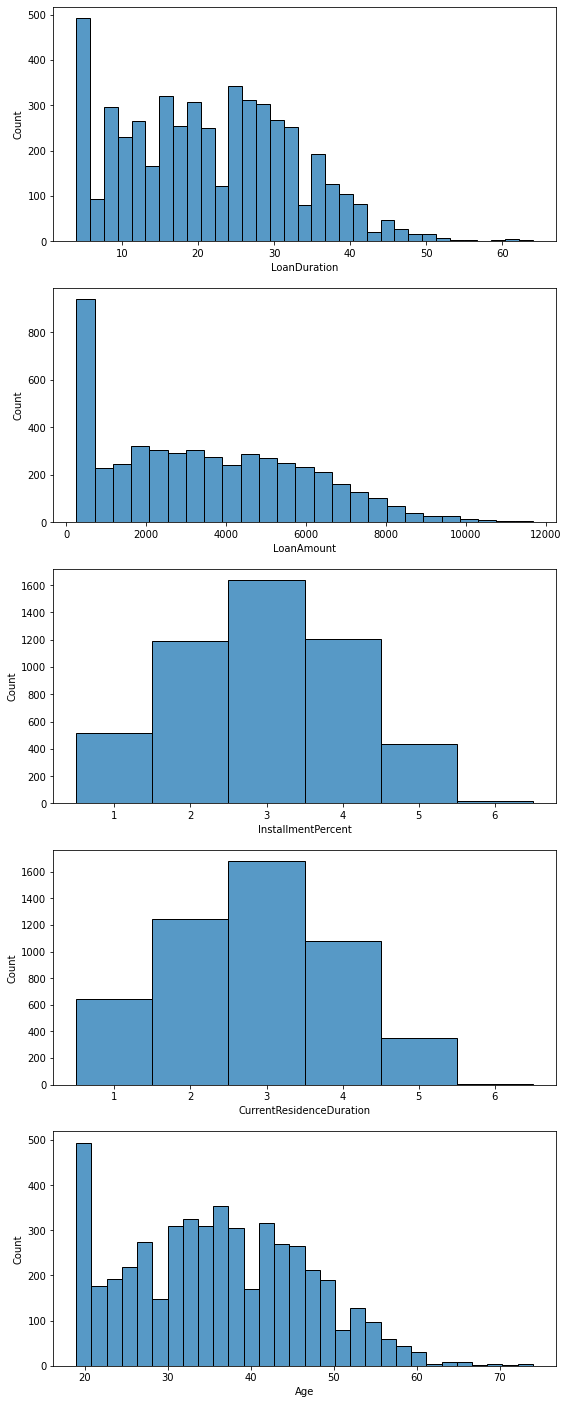

In [ ]:
fig, axs = plt.subplots(nrows=5, figsize=(9,25))

# Plot histograms
sns.histplot((train["LoanDuration"]), ax=axs[0])
sns.histplot((train["LoanAmount"]), ax=axs[1])
train["InstallmentPercent"].astype(int)
sns.histplot((train["InstallmentPercent"]), discrete=True, ax=axs[2])
train["CurrentResidenceDuration"].astype(int)
sns.histplot((train["CurrentResidenceDuration"]), discrete=True, ax=axs[3])
sns.histplot((train["Age"]), ax=axs[4])
plt.show()

Let's see the distribution through boxplot to spot outliers.

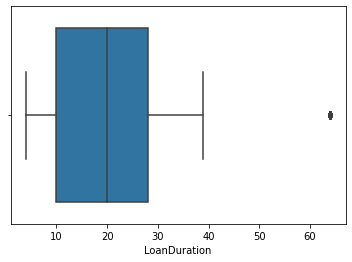

In [ ]:
# Plot LoanDuration
sns.boxplot(x=train["LoanDuration"], data=train["LoanDuration"])

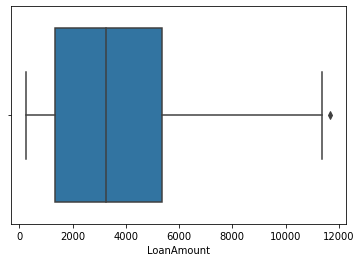

In [ ]:
# Plot LoanAmount
sns.boxplot(data=train["LoanAmount"], x=train["LoanAmount"])

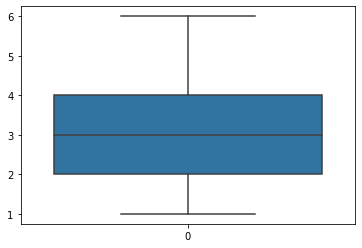

In [ ]:
# Plot InstallmentPercent 
sns.boxplot(data=train["InstallmentPercent"])

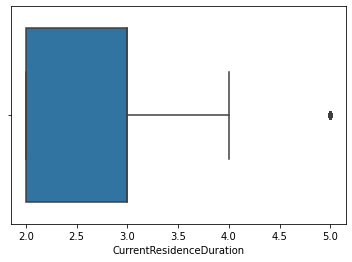

In [ ]:
# Plot CurrentResidenceDuration
sns.boxplot(data=train["CurrentResidenceDuration"], x=train["CurrentResidenceDuration"])

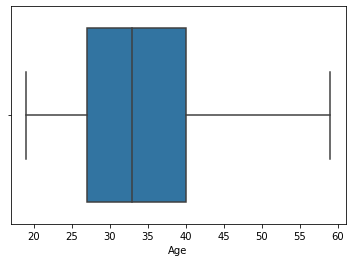

In [ ]:
# Plot Age
sns.boxplot(data=train["Age"], x=train["Age"])

**Calculate the correlation of the variables**

In [ ]:
correlation = train.corr()

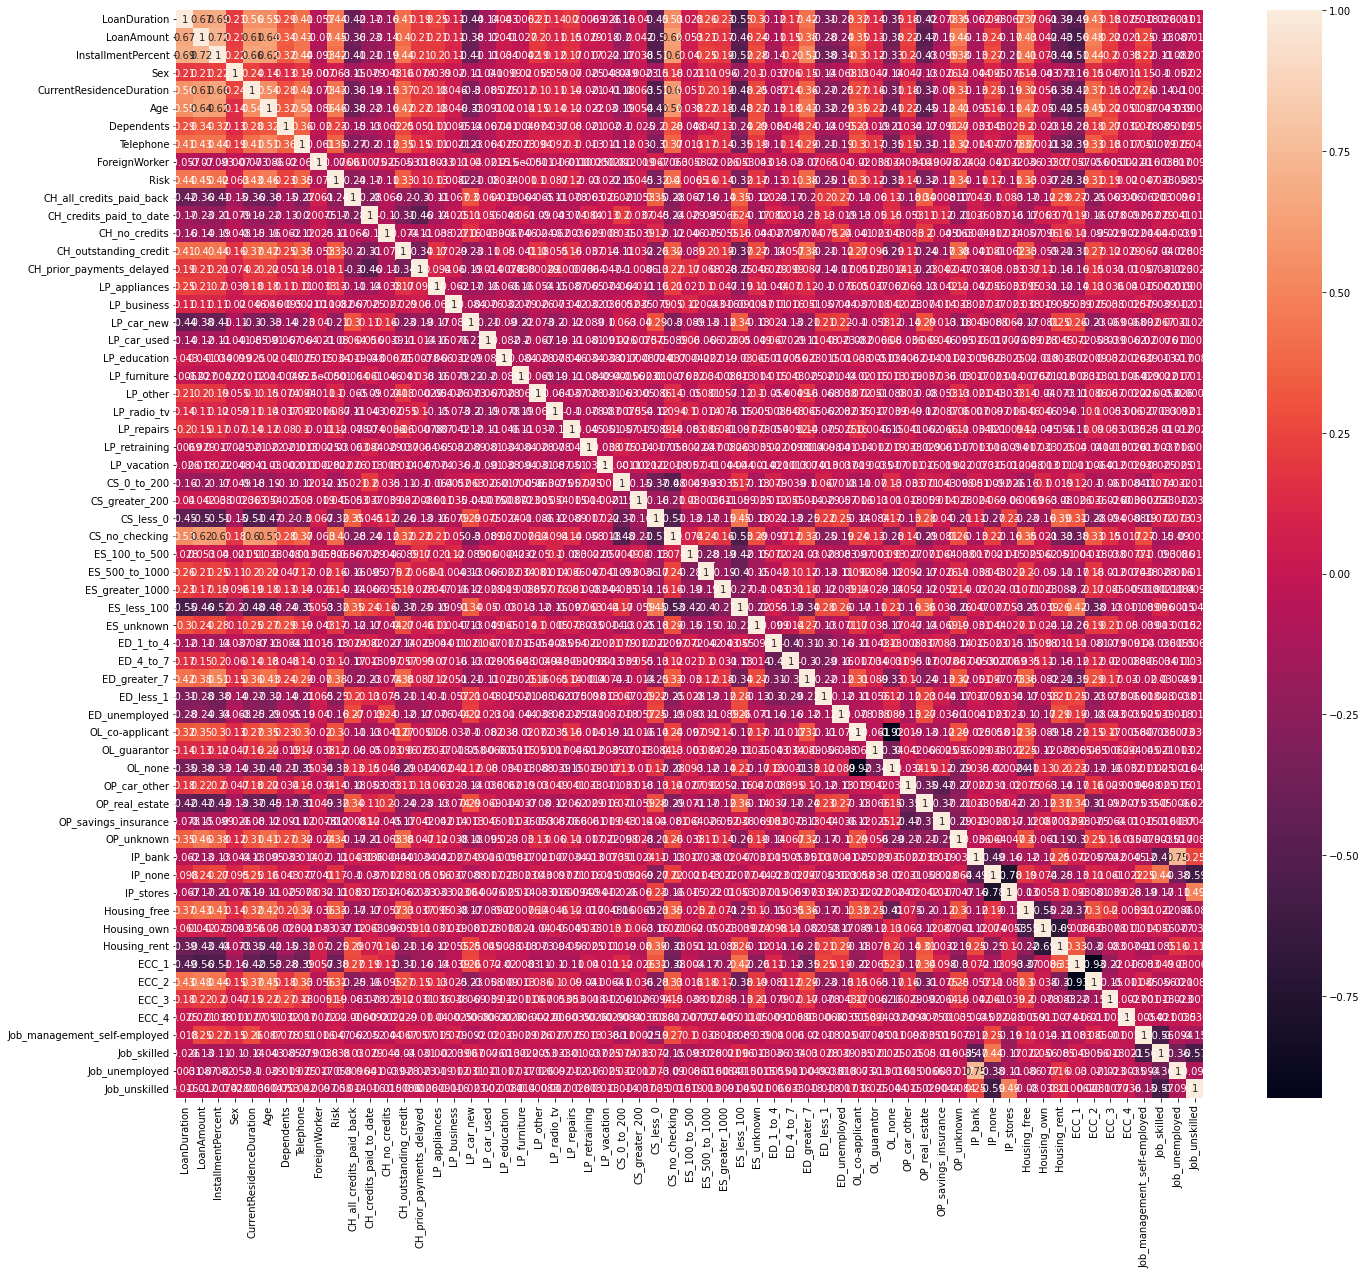

In [ ]:
# Plot correlation
plt.figure(figsize=(23,20))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Address multicollinearity**

There seems to be multicollinearity among predictors as we can see in the heat map above. Let's remove the features that can relatively be represented by other predictor. For example, ECC_1 and ECC_2 are highly correlated hence we're going to remove ECC_1 and rename ECC_2 as ECC_1_or_2. We will do the same thing to OL_None with OL_Coapplicant.

In [ ]:
# Rename ECC_2 and OL_co-applicant
train.rename(columns={'ECC_2': 'ECC_1_or_2', 'OL_co-applicant': 'OL_co-applicant_or_none'}, inplace=True)

In [ ]:
# Drop column ECC_1 and OL_none
train.drop(['ECC_1', 'OL_none'], axis=1)

,CustomerID,LoanDuration,LoanAmount,InstallmentPercent,Sex,CurrentResidenceDuration,Age,Dependents,Telephone,ForeignWorker,Risk,CH_all_credits_paid_back,CH_credits_paid_to_date,CH_no_credits,CH_outstanding_credit,CH_prior_payments_delayed,LP_appliances,LP_business,LP_car_new,LP_car_used,LP_education,LP_furniture,LP_other,LP_radio_tv,LP_repairs,LP_retraining,LP_vacation,CS_0_to_200,CS_greater_200,CS_less_0,CS_no_checking,ES_100_to_500,ES_500_to_1000,ES_greater_1000,ES_less_100,ES_unknown,ED_1_to_4,ED_4_to_7,ED_greater_7,ED_less_1,ED_unemployed,OL_co-applicant_or_none,OL_guarantor,OP_car_other,OP_real_estate,OP_savings_insurance,OP_unknown,IP_bank,IP_none,IP_stores,Housing_free,Housing_own,Housing_rent,ECC_1_or_2,ECC_3,ECC_4,Job_management_self-employed,Job_skilled,Job_unemployed,Job_unskilled
0,713a336c-a255-4e2d-9d57-90b3e99e2f06,31,1889,3,0,3,32,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
1,140b363f-a3fe-4828-a33f-7284dfdb3969,18,462,2,0,2,37,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0
2,43b7b51d-5eda-4860-b461-ebef3d3436f4,15,250,2,1,3,28,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
3,f40eaf08-e6d1-4765-ab20-c5f7faca1635,28,3693,3,1,2,32,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
4,1728910a-d3ff-4799-ac50-203a3a58a3fb,28,6235,3,1,3,57,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,e77fa77b-78da-4607-a2fa-ede36c1e968f,27,4650,3,1,4,40,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
4996,6e71db4b-375c-42e1-b4a8-3292c007967a,11,250,3,1,3,32,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4997,db501d22-e0c9-4f38-bf05-7f2c1df35395,32,6536,5,1,5,54,2,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1
4998,802055d6-6aa7-4532-bf1c-0b8b114b483d,38,1597,3,0,3,27,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0


###**Remove outliers**

Let's replace outliers with the mean values using Z score.

In [ ]:
def replace_outliers_z_score(dataframe, column, Z=3):

    from scipy.stats import zscore
    df = dataframe.copy(deep=True)
    df.dropna(inplace=True, subset=[column])

    # Calculate mean without outliers
    df["zscore"] = zscore(df[column])
    mean_ = df[(df["zscore"] > -Z) & (df["zscore"] < Z)][column].mean()

    # Replace with mean values
    dataframe[column] = dataframe[column].fillna(mean_)
    dataframe["zscore"] = zscore(dataframe[column])
    no_outliers = dataframe[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z)].shape[0]
    dataframe.loc[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z),column] = mean_
    
    # Print message
    print("Replaced:", no_outliers, " outliers in ", column)
    return dataframe.drop(columns="zscore")

In [ ]:
# Replace outliers with mean values
train = replace_outliers_z_score(train,"LoanDuration")
train = replace_outliers_z_score(train,"LoanAmount")
train = replace_outliers_z_score(train,"InstallmentPercent")
train = replace_outliers_z_score(train,"CurrentResidenceDuration")

Replaced: 11  outliers in  LoanDuration
Replaced: 4  outliers in  LoanAmount
Replaced: 0  outliers in  InstallmentPercent
Replaced: 0  outliers in  CurrentResidenceDuration


In [ ]:
# Reset index of the dataframe
train.reset_index(drop=True, inplace=True)

**Plot the distribution after removing outliers**

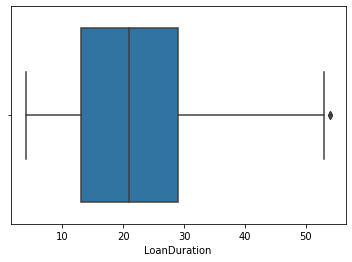

In [ ]:
# Plot LoanDuration
sns.boxplot(x=train["LoanDuration"], data=train["LoanDuration"])

As we can see, the outliers of more than 60 in loan duration has been replaced and there are still ones slightly above 50 but it is due to the Z score threshold of 3.

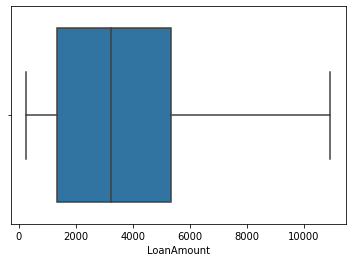

In [ ]:
# Plot LoanAmount
sns.boxplot(data=train["LoanAmount"], x=train["LoanAmount"])

##**Modeling and Evaluation**

**Check the dataframe**

In [ ]:
# See the columns of the dataframe
pd.DataFrame({"Dataframe columns": train.columns})

,Dataframe columns
0,CustomerID
1,LoanDuration
2,LoanAmount
3,InstallmentPercent
4,Sex
...,...
57,ECC_4
58,Job_management_self-employed
59,Job_skilled
60,Job_unemployed


**Split the data**

In [ ]:
# Split the data into "risk" as response and the rest as features
y = train["Risk"]
X = train.drop(labels = ["CustomerID","Risk"], axis = 1)

In [ ]:
# Split the data into training and validation data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

###**Modeling**

In [ ]:
# Import algorithms and metrics evaluation packages
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
# Function for evaluating model
def evaluate(model_, X_test_, y_test_): 

    # Get the model predictions
    prediction_test_ = model_.predict(X_test_)

    # Print the evaluation metrics as pandas dataframe 
    results = pd.DataFrame({"Accuracy" : [accuracy_score(y_test_, prediction_test_)], 
                            "Precision" : [precision_score(y_test_, prediction_test_)], 
                            "Recall" : [recall_score(y_test_, prediction_test_)],
                            "F_score" : f1_score(y_test_, prediction_test_, average='binary')})
    return results

**Logistic Regression**

In [ ]:
# Fit features train to target train using Logistic Regression
LogResmodel = LogisticRegression().fit(X_train, y_train)
LogResmetrics = evaluate(LogResmodel, X_test, y_test)
LogResmetrics

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Accuracy,Precision,Recall,F_score
0,0.8152,0.755952,0.630273,0.687415


**Random Forest**

In [ ]:
# Fit features train to target train using Random Forest
RFmodel = RandomForestClassifier().fit(X_train, y_train)
RFmetrics = evaluate(RanFormodel, X_test, y_test)
RFmetrics

,Accuracy,Precision,Recall,F_score
0,0.8112,0.779264,0.578164,0.663818


**K-NN**

In [ ]:
# Fit features train to target train using KNN
KNNmodel = KNeighborsClassifier(n_neighbors=8).fit(X_train, y_train)
KNNmetrics = evaluate(KNNmodel, X_test, y_test)
KNNmetrics

,Accuracy,Precision,Recall,F_score
0,0.7376,0.636364,0.434243,0.516224


**Gaussian Naive Bayes**

In [ ]:
# Fit features train to target train using Gaussian Naive Bayes
GaussianNBmodel = GaussianNB().fit(X_train, y_train)
GaussianNBmetrics = evaluate(GaussianNBmodel, X_test, y_test)
GaussianNBmetrics

,Accuracy,Precision,Recall,F_score
0,0.744,0.581854,0.73201,0.648352


**Gradient Boosting Classifier**

In [ ]:
# Fit features train to target train using Gradient Boosting Classifier
GBmodel = GradientBoostingClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
GBmetrics = evaluate(GBCmodel, X_test, y_test)
GBmetrics

,Accuracy,Precision,Recall,F_score
0,0.8096,0.752294,0.610422,0.673973


**Extreme Gradient Boosting**

In [ ]:
# Fit features train to target train using XGBoost
XGBmodel = xgb.XGBClassifier(learning_rate=0.1,max_depth=6,n_estimators=500,n_jobs=-1).fit(X_train, y_train)
XGBmetrics = evaluate(XGBmodel, X_test, y_test)
XGBmetrics

,Accuracy,Precision,Recall,F_score
0,0.776,0.680352,0.575682,0.623656


**Support Vector Classification**

In [ ]:
SVCmodel = svm.SVC().fit(X_train, y_train)
SVCmetrics = evaluate(SVMmodel, X_test, y_test)
SVCmetrics

,Accuracy,Precision,Recall,F_score
0,0.7352,0.640625,0.406948,0.497724


**Decision Tree**

In [ ]:
DTmodel = tree.DecisionTreeClassifier().fit(X_train, y_train)
DTmetrics = evaluate(DTmodel, X_test, y_test)
DTmetrics

,Accuracy,Precision,Recall,F_score
0,0.7232,0.565517,0.610422,0.587112


**Multi-layer Perceptron**

In [ ]:
MLPmodel = MLPClassifier().fit(X_train, y_train)
MLPmetrics = evaluate(MLPmodel, X_test, y_test)
MLPmetrics

,Accuracy,Precision,Recall,F_score
0,0.736,0.566972,0.766749,0.651899


###**Models Comparison**

In [ ]:
# Function to make a dataframe of sorted metrics
def metricscomparison(modelmetrics_):

    # Make a dataframe containing models and their respective metrics
    models = pd.DataFrame({
        "Model": ["Logistic Regression", "Random Forest", 
                  "KNN", "Gaussian Naive Bayes", 
                  "Gradient Boosting", "XGBoost", 
                  "Support Vector Classification", "Decision Tree", 
                  "Multi-layer Perceptron"],
        modelmetrics_: [
            LogResmetrics[modelmetrics_].values, 
            RFmetrics[modelmetrics_].values,  
            KNNmetrics[modelmetrics_].values, 
            GaussianNBmetrics[modelmetrics_].values, 
            GBmetrics[modelmetrics_].values, 
            XGBmetrics[modelmetrics_].values,
            SVCmetrics[modelmetrics_].values,
            DTmetrics[modelmetrics_].values,
            MLPmetrics[modelmetrics_].values
        ]})

    # Change metrics data type to float
    models[modelmetrics_] = models[modelmetrics_].astype(float)

    # Short models based on metrics
    models = models.sort_values(by=modelmetrics_, ascending=False)
    return models

In [ ]:
# Function to plot sorted metrics
def metricsplot(metrics_column, metrics_dataframe):
    # metricscolumn e.g. dataframe.accuracy
    # metrics_dataframe e.g. dataframe

    # Set barplot attributes
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x=metrics_column, y='Model', data=metrics_dataframe, palette='Blues_r')
    y = metrics_column

    # Adjust the barplot size and number rounding
    for i, v in enumerate(y):
        ax.text(v+0.003, i+.1, str(round(v,2)), fontweight='bold')

    # Plot sorted metrics of the models
    plt.title('Models Evaluation')
    plt.show()

**Accuracy**

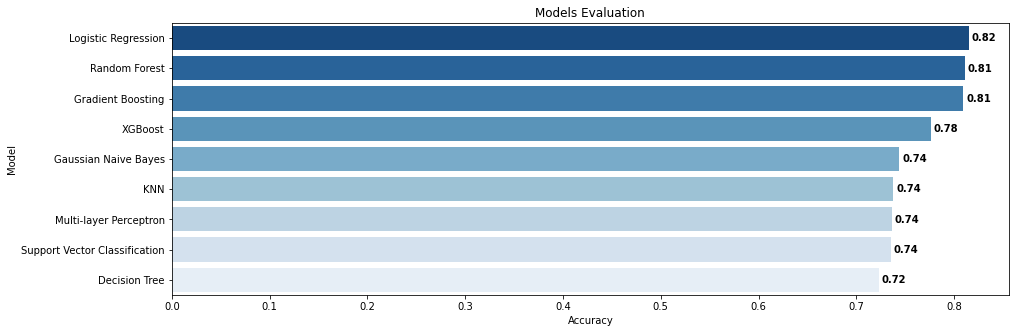

In [ ]:
# Call function of models sorting
accuracy_comparison = metricscomparison('Accuracy')

# Call function of ploting sorted models
metricsplot(accuracy_comparison.Accuracy, accuracy_comparison)

**Precision**

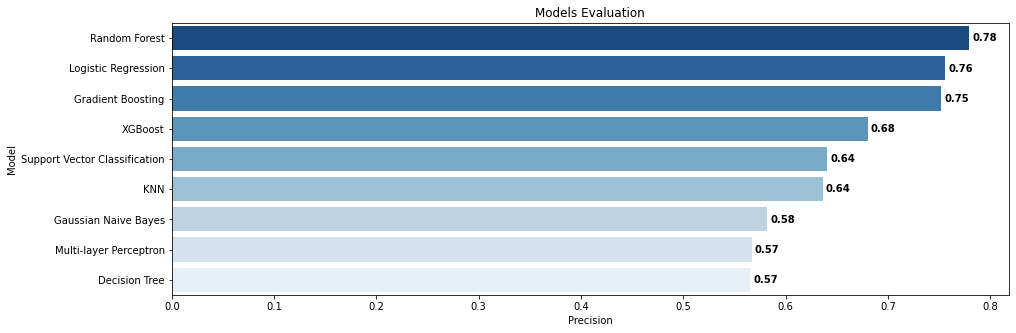

In [ ]:
# Call function of models sorting
precision_comparison = metricscomparison('Precision')

# Call function of ploting sorted models
metricsplot(precision_comparison.Precision, precision_comparison)

**Recall**

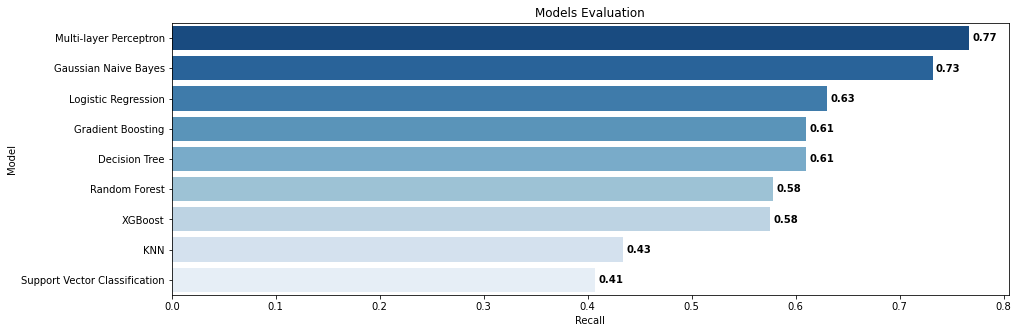

In [ ]:
# Call function of models sorting
recall_comparison = metricscomparison('Recall')

# Call function of ploting sorted models
metricsplot(recall_comparison.Recall, recall_comparison)

**F-score**

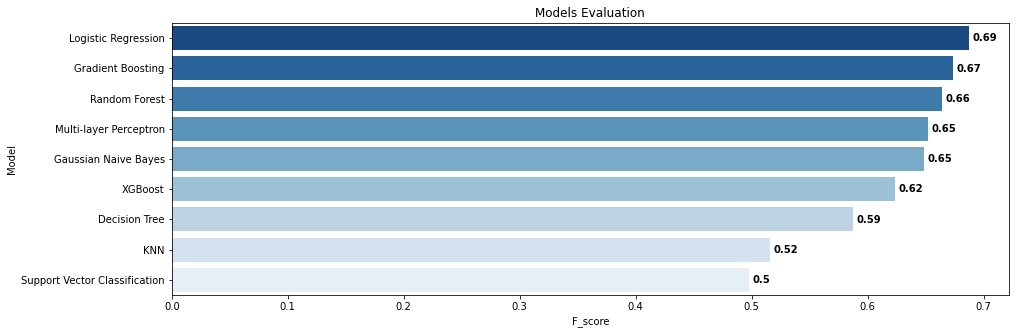

In [ ]:
# Call function of models sorting
fscore_comparison = metricscomparison('F_score')

# Call function of ploting sorted models
metricsplot(fscore_comparison.F_score, fscore_comparison)

###**Choose a Model**

As we can see, there is no single algorithm that tops the other in all metrics but Logistic Regression is always included in the top three in every category. We can choose a model based on what metrics is more important for us. For example, if our focus is to gather positivity correctly (like covid cases) then the model with high sensitivity/recall will suit. If our focus is to know the absence of something then we will prefer model with higher specificity. There are many more possibilities of consideration that can be used related to metrics in choosing the best algorithm for a given problem. In this occasion **Logistic Regression will be the model of this project**.

Let's see the detail of how Logistic Regression make predictions in this project.

**Confussion Matrix**

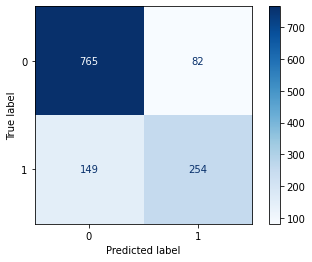

In [ ]:
# Import confussion matrix library
from sklearn.metrics import plot_confusion_matrix

# Plot confussion matrix
class_names = ['0', '1']
disp = plot_confusion_matrix(LogResmodel, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 values_format = '.0f')
plt.grid(False)  
plt.show(disp)

**ROC and AUC**

In [ ]:
def calculate_roc_auc(model_, X_test_, y_test_):
    """
    Evaluate the roc-auc score
    """
    # Get the model predictions
    # We are using the prediction for the class 1 -> risk
    prediction_test_ = model_.predict_proba(X_test_)[:,1] 
    
    # Compute roc-auc
    fpr, tpr, thresholds = metrics.roc_curve(y_test_, prediction_test_)

    # Print the evaluation metrics as pandas dataframe
    score = pd.DataFrame({"ROC-AUC" : [metrics.auc(fpr, tpr)]}) 
   
    return fpr, tpr, score

In [ ]:
def plot_roc_auc(fpr,tpr): 
    """
    Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates.
    """
    # Initialize plot
    f, ax = plt.subplots(figsize=(14,8)) # Plot ROC
    
    # Plot ROC
    roc_auc = metrics.auc(fpr, tpr) 
    ax.plot(fpr, tpr, lw=2, alpha=0.3, label="AUC = %0.2f" % (roc_auc)) 

    # Plot the random line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=3, color='r', label="Random", alpha=.8)
  
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05]) 
    ax.set_ylim([-0.05, 1.05]) 
    ax.set_xlabel("False Positive Rate (FPR)") 
    ax.set_ylabel("True Positive Rate (TPR)") 
    ax.set_title("ROC-AUC") 
    ax.legend(loc="lower right")
    plt.show()

In [ ]:
# Calculate AUC score
fpr, tpr, auc_score = calculate_roc_auc(LogResmodel, X_test, y_test)
auc_score

,ROC-AUC
0,0.857992


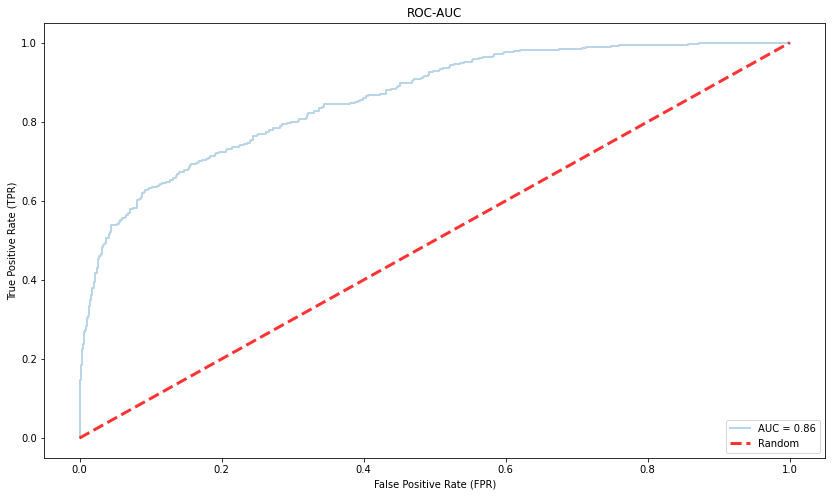

In [ ]:
# Plot ROC AUC
plot_roc_auc(fpr, tpr)
plt.show()